
# Convolutional Neural Network CNN
1. Using Word2Vec implementing CNN model
2. Dispaly Confusion Matrix, precision, recall and F1-score
3. Display few prediction using predict module. 
4. Get 10-fold Average of the CNN model.

In [76]:
from __future__ import division, print_function

# dataframe
import pandas as pd

# numpy array
import numpy as np

# figures visualization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
import seaborn as sns

# calc accuracy
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# word2vec
import gensim 
from gensim import models
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors

# CNN model and keras preprocessing
import keras
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding, Conv2D, GlobalMaxPooling2D
from keras.models import Sequential
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# nltk data preprocessing
import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize 
from nltk.stem import WordNetLemmatizer

# stopword - remove buzz word
from nltk.corpus import stopwords

# splitting data
from sklearn.model_selection import train_test_split

# punctuation - data imbalance
import collections
import re
import string

# File path
import os
import os.path
from os import path


In [77]:
# original english file
filename  = 'Eng-Hin-data/hindi-anot-shuffled'
orig_df = pd.read_csv(filename + '.csv',  
               delimiter=',')
orig_df.columns = ['Text', 'Label']

In [78]:
# Run only for English data 
orig_df["Text"] = orig_df["Text"].astype(str)
orig_df["Label"] = orig_df["Label"].astype(str)

In [79]:
orig_df.head(7)

,Text,Label
0,'गाजा में दीवाली की ढेरो बधाई मित्रो 😊💐 #Is...,2
1,'@SanjayGadhiaINC @IndiaToday18 अज़ाबे इलाही 👍,1
2,'आखिर अब #सुशांत_सिंह_राजपूत जी को न्याय मिल ज...,0
3,'अमीन के 500 से अधिक छात्रों ने सर्वे भवन के ग...,0
4,'@deoriapolice @Uppolice @myogiadityanath @spg...,0
5,'@khanumarfa जेहादी सोच जब #राहत_इंदौरी को भी ...,2
6,'आज के दिन ही मेरा क्रिकेट प्रेम भी समाप्त हो गया,0


In [80]:
df = orig_df

### Class count

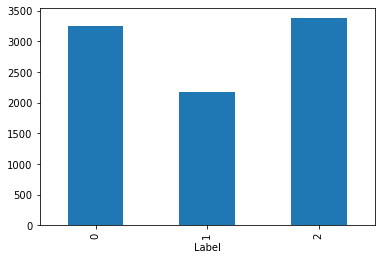

In [81]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
df.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [82]:
# For entire dataset sentences for each labels 
df.Label.value_counts()

2    3375
0    3244
1    2174
Name: Label, dtype: int64

### Balancing Data

In [83]:
#balancing data 
from collections import Counter
import numpy as np
def balanceClasses(xs, ys):
    item = {}
    new_ys = []
    new_xs = []
    #"""Undersample xs, ys to balance classes."""
    freqs = Counter(ys)
    # the most common class  is the maximum number we want for all classes
    max_allowable = (freqs.most_common()[0][1])
    
    for val in freqs.most_common(): # List
        nums = np.random.randint(1000)
        i = 1
        item[val[0]] = max_allowable - val[1]
        
        if item[val[0]] > 0:            
            while(item[val[0]] - i != 0): 
                nums = nums + 1
                if ys[nums] == val[0]:
                    i += 1
                    new_ys.append(ys[nums])
                    new_xs.append(xs[nums])
    return new_xs, new_ys

In [84]:
new_text, new_label = balanceClasses(df['Text'], df['Label'])

In [85]:
data = pd.DataFrame(new_text)
data.columns = ['Text']
data['Label'] = new_label
data = pd.concat([df, data])

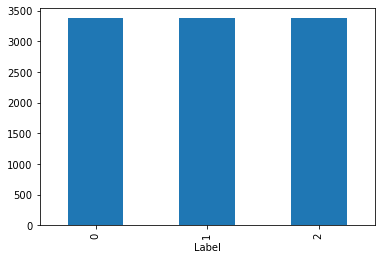

In [86]:
fig1 = plt.figure(figsize=(6,4))
data.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [87]:
data.Label.value_counts()

2    3375
0    3374
1    3374
Name: Label, dtype: int64

In [88]:
data=data.sample(frac=1).reset_index(drop=True)
data

,Text,Label
0,'@MukeshForInc @ICICIBank हाहा 😂😂 आ रही हैं दी...,0
1,'@GaneshGINC मुकेश भाकर जिन्दाबाद,0
2,@Muhamma27229770 @TajinderBagga अरे जिहादी अब ...,2
3,'@achchheofficial बहुजन समाज पार्टी जिंदाबाद।,0
4,'@bagga_daku @msdhoni भैया जिंदाबाद,0
...,...,...
10118,'@raihanrvadra @RaihanRVadra__ @MeThomasVijaya...,0
10119,'भारत रत्न उस्ताद बिस्मिल्लाह खान की धरोहर – क...,1
10120,'@PAPA__Tweets @Chandra79757719 जिहादी मिडिया ...,2
10121,'सिख धर्म के तृतीय गुरु अमरदास जी के ज्योति ज्...,1


### Data Preprocessing

In [92]:
def textPattern(text):

    # Clean the text
    text = re.sub(r"@", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\= =", " ", text)
    text = re.sub(r"\==", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

data['Text'] = data['Text'].apply(lambda x: textPattern(x))

In [93]:
# Word Tokenization
tokens = [word_tokenize(sen) for sen in data.Text]

In [94]:
# Remove Link
def removeLink(token):
    word = []
    for w in token:
        if not w.startswith('http'):
            word.append(w)
    return word 
    
removedLink_tokens = [removeLink(token) for token in tokens]

In [95]:
# Word Lemmatization
def lemmatization(token):
    return [lemmatizer.lemmatize(w) for w in token] 

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatization(token) for token in removedLink_tokens]

In [96]:
# Removing Stopwords
stoplist=open("Devanagari/stopwords.txt","r")

In [97]:
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in lemmatized_tokens]
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

In [98]:
zero  = []
one = []
two = []
for l in data.Label:
    
    if l == '0':
        zero.append(1)
        one.append(0)
        two.append(0)
    elif l == '1':
        zero.append(0)
        one.append(1)
        two.append(0)
    elif l == '2':
        zero.append(0)
        one.append(0)
        two.append(1)
        
data['0']= zero
data['1']= one
data['2']= two

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2']]

In [99]:
category_id = []
for l in data.Label:
    
    if l == '0':
        category_id.append('0')
    elif l == '1':
        category_id.append('1')
    elif l == '2':
        category_id.append('2')
        
data['Category_id'] = category_id

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2', 'Category_id' ]]
data.head(25)

,Text_Final,tokens,Label,0,1,2,Category_id
0,MukeshForInc ICICIBank हाहा 😂😂 आ रही हैं दीवाल...,"[MukeshForInc, ICICIBank, हाहा, 😂😂, आ, रही, है...",0,1,0,0,0
1,GaneshGINC मुकेश भाकर जिन्दाबाद,"[GaneshGINC, मुकेश, भाकर, जिन्दाबाद]",0,1,0,0,0
2,Muhamma27229770 TajinderBagga अरे जिहादी अब तु...,"[Muhamma27229770, TajinderBagga, अरे, जिहादी, ...",2,0,0,1,2
3,achchheofficial बहुजन समाज पार्टी जिंदाबाद।,"[achchheofficial, बहुजन, समाज, पार्टी, जिंदाबाद।]",0,1,0,0,0
4,bagga_daku msdhoni भैया जिंदाबाद,"[bagga_daku, msdhoni, भैया, जिंदाबाद]",0,1,0,0,0
5,सुशांत को अपना करीबी दोस्त बताने वाले फिल्ममेक...,"[सुशांत, को, अपना, करीबी, दोस्त, बताने, वाले, ...",0,1,0,0,0
6,RifatJawaid जिहादी की मौत पर अफसोस नहीं प्रकट ...,"[RifatJawaid, जिहादी, की, मौत, पर, अफसोस, नहीं...",2,0,0,1,2
7,बढ़ती जेहादी संख्या लेबनान की मजबूरी है। भारत ...,"[बढ़ती, जेहादी, संख्या, लेबनान, की, मजबूरी, है...",2,0,0,1,2
8,हज़रत इमाम हुसैन अलैहिस्सलाम ने कहा कि दूसरों ...,"[हज़रत, इमाम, हुसैन, अलैहिस्सलाम, ने, कहा, कि,...",1,0,1,0,1
9,sikarchairmanJK आमीन,"[sikarchairmanJK, आमीन]",1,0,1,0,1


In [100]:
#remove empty row
data = data[data.tokens != '']

In [101]:
from io import StringIO
category_id_df = data[['Label', 'Category_id']].drop_duplicates().sort_values('Category_id')
category_to_label_dict = dict(category_id_df.values)
label_to_category_dict = dict(category_id_df[['Category_id', 'Label']].values)

#### Split Data into test and train
We will use 90 % data for training and 20 % for testing. We use random state so every time we get the same training and testing data.

In [102]:
data.shape

(10123, 7)

In [103]:
data_train, data_test = train_test_split(data, test_size=0.10, shuffle = True)


In [104]:
# # total training words
totalTrainingWords = [word for tokens in data_train["tokens"] for word in tokens]

# # Storing Length of the training sentence
lengthTrainingSentences = [len(tokens) for tokens in data_train["tokens"]]

# # training Vocabulary size
trainingVocabSize = sorted(list(set(totalTrainingWords)))

## Total number of lines
linesCount = len(data_train["tokens"])

### Load Google Word2vec model

In [25]:
word2vec_path = 'GoogleNews-vectors-negative300.bin'

In [26]:
from gensim import models
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)


In [105]:
MAX_SEQUENCE_LENGTH = 150
EMBEDDING_DIM = 300


### Tokenize and Pad sequences

In [106]:
tokenizer = Tokenizer(num_words=len(trainingVocabSize), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 19206 unique tokens.


In [107]:
cnnTrainData = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [108]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(19207, 300)


In [109]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
cnnTestData = pad_sequences(test_sequences, maxlen= MAX_SEQUENCE_LENGTH)

### Define CNN

The model is from the paper 'Convolutional Neural Networks for Sentence Classification' we have updated the network according to our requirement [1]

In [110]:
label_names = ['0', '1', '2']

In [111]:
def ConvolutionalNeuralNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    # Embedding layer
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    
    #Kernal (window) size
    filter_sizes = [2,3,4,5]

    # Convolution Layer and max-pooling
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=512, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)
        
    l_merge = concatenate(convs, axis=1)
    
    # softmax layer for multiclass identification 
    x = Dropout(0.1)(l_merge)  
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss= 'categorical_crossentropy',
                    optimizer = keras.optimizers.RMSprop(learning_rate=1e-3),
#                    optimizer='adam',
                  metrics=['accuracy'])
    return model

In [112]:
# Splitting train data into X_train and y_train
y_train = data_train[label_names].values
x_train = cnnTrainData
y_tr = y_train

In [113]:
# Splitting train data into X_test and y_test
y_test = data_test[label_names].values
x_test = cnnTestData
y_tst = y_test

In [114]:
model = ConvolutionalNeuralNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, len(list(label_names)))

In [115]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 150, 300)     5762100     input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 149, 512)     307712      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 148, 512)     461312      embedding_2[0][0]                
____________________________________________________________________________________________

### Train CNN

In [116]:
num_epochs = 6
batch_size = 512

In [117]:
# training our model on train data
history = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/6
17/17 [==============================] - 40s 2s/step - loss: 5.2949 - accuracy: 0.3777 - val_loss: 1.5463 - val_accuracy: 0.3348
Epoch 2/6
17/17 [==============================] - 40s 2s/step - loss: 1.0720 - accuracy: 0.4880 - val_loss: 0.9536 - val_accuracy: 0.5631
Epoch 3/6
17/17 [==============================] - 39s 2s/step - loss: 1.0250 - accuracy: 0.5956 - val_loss: 1.1054 - val_accuracy: 0.3974
Epoch 4/6
17/17 [==============================] - 40s 2s/step - loss: 0.6554 - accuracy: 0.7458 - val_loss: 0.6229 - val_accuracy: 0.7135
Epoch 5/6
17/17 [==============================] - 40s 2s/step - loss: 0.4850 - accuracy: 0.8231 - val_loss: 1.2869 - val_accuracy: 0.5137
Epoch 6/6
17/17 [==============================] - 40s 2s/step - loss: 0.4724 - accuracy: 0.8100 - val_loss: 0.4341 - val_accuracy: 0.8562


In [118]:
# evaluate on test data
results = model.evaluate(x_test, y_tst)

32/32 [==============================] - 2s 62ms/step - loss: 0.4189 - accuracy: 0.8667


In [119]:
# predict model
predictions = model.predict(cnnTestData, batch_size=1024, verbose=1)

1/1 [==============================] - 0s 1ms/step


### Testing few sentences using our model

In [123]:

labels = ['0', '1', '2']

def makeprediction(texts):
    tk = Tokenizer()
    tk.fit_on_texts(texts)
    index_list = tk.texts_to_sequences(texts)
    x_train = pad_sequences(index_list, maxlen=150)
    pred = model.predict(x_train)
    result = labels[np.argmax(pred)]
    return result

In [122]:
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [54]:
sum(data_test.Label==prediction_labels)/len(prediction_labels)

0.7275419545903258

In [47]:
data_test.Label.value_counts()

0    369
2    343
1    301
Name: Label, dtype: int64

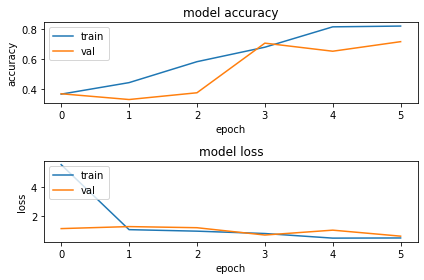

In [48]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

In [49]:
results = confusion_matrix(data_test.Label, prediction_labels)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(data_test.Label, prediction_labels))
print ('Report : ')
print (classification_report(data_test.Label, prediction_labels))

Confusion Matrix :
[[235   7 127]
 [ 21 165 115]
 [  2   4 337]]
Accuracy Score : 0.7275419545903258
Report : 
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       369
           1       0.94      0.55      0.69       301
           2       0.58      0.98      0.73       343

    accuracy                           0.73      1013
   macro avg       0.81      0.72      0.72      1013
weighted avg       0.81      0.73      0.73      1013



                        Convolution Neural Network


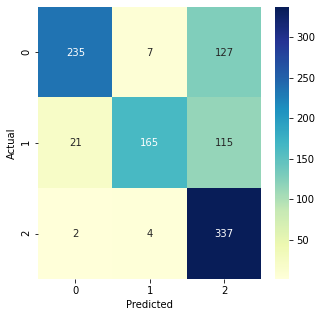

In [50]:
from sklearn.metrics import confusion_matrix
print("                        Convolution Neural Network")
conf_mat = confusion_matrix(data_test.Label, prediction_labels)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap ='YlGnBu',
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Testing CNN using KFold cross validation

In [59]:
from sklearn.model_selection import KFold
from scipy.stats import zscore
from sklearn import metrics
import tensorflow as tf
import random

kf = kf = KFold(n_splits=10)
f_score=[]
fold = 10
label_names = ['0', '1', '2']
num_epochs = 5
batch_size = 32
oos_y = []
oos_pred = []
results = []
train_res =[]

for i in range(fold):
    print("Fold: ", i+1)
    data_train, data_test = train_test_split(data, test_size=0.10, shuffle = True)

    # # total training words
    totalTrainingWords = [word for tokens in data_train["tokens"] for word in tokens]

    # # Storing Length of the training sentence
    lengthTrainingSentences = [len(tokens) for tokens in data_train["tokens"]]

    # # training Vocabulary size
    trainingVocabSize = sorted(list(set(totalTrainingWords)))

    ## Total number of lines
    linesCount = len(data_train["tokens"])
    
    tokenizer = Tokenizer(num_words=len(trainingVocabSize), lower=True, char_level=False)
    tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
    training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

    train_word_index = tokenizer.word_index
    cnnTrainData = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)
    
    train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
    
    for word,index in train_word_index.items():
        train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
        
    test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
    cnnTestData = pad_sequences(test_sequences, maxlen= MAX_SEQUENCE_LENGTH)
    
    # Splitting train data into X_train and y_train
    y_train = data_train[label_names].values
    x_train = cnnTrainData
    y_tr = y_train
    
    # Splitting train data into X_test and y_test
    y_test = data_test[label_names].values
    x_test = cnnTestData
    y_tst = y_test
    
    # create model
    model = ConvolutionalNeuralNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, len(list(label_names)))
    
    #Train Model
    history = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)
      
    # model evaluate
    
    print("Evaluate on training data")
    train_res.append(model.evaluate(x_train, y_tr, batch_size=128))
    print("Evaluate on testing data")
    results.append(model.evaluate(x_test, y_tst, batch_size=128))

    predictions = model.predict(x_test, batch_size=1024, verbose=0)
    oos_y.append(y_tst)
    oos_pred.append(predictions)
    #tot_accuracy_score = (predictions, y_tst)
    tot_score = np.sqrt(metrics.mean_squared_error(predictions, y_tst))
    f_score.append(tot_score)
   

Fold:  1
Epoch 1/5
257/257 [==============================] - 60s 233ms/step - loss: 0.8422 - accuracy: 0.7280 - val_loss: 0.3198 - val_accuracy: 0.8672
Epoch 2/5
257/257 [==============================] - 61s 239ms/step - loss: 0.2719 - accuracy: 0.8995 - val_loss: 0.2176 - val_accuracy: 0.9001
Epoch 3/5
257/257 [==============================] - 61s 239ms/step - loss: 0.2282 - accuracy: 0.9169 - val_loss: 0.4257 - val_accuracy: 0.8946
Epoch 4/5
257/257 [==============================] - 62s 240ms/step - loss: 0.2029 - accuracy: 0.9261 - val_loss: 0.1689 - val_accuracy: 0.9407
Epoch 5/5
257/257 [==============================] - 61s 239ms/step - loss: 0.1903 - accuracy: 0.9344 - val_loss: 0.2088 - val_accuracy: 0.9254
Evaluate on training data
72/72 [==============================] - 19s 264ms/step - loss: 0.1604 - accuracy: 0.9366
Evaluate on testing data
8/8 [==============================] - 2s 226ms/step - loss: 0.2708 - accuracy: 0.9151
Fold:  2
Epoch 1/5
257/257 [===============

In [64]:
import statistics 
# for i in range(len(results)):
#     print("Fold: ", i+1)
#     print("test loss, test acc:", results[i])

score_val = []
for i in results:
    score_val.append(i[1])
x = statistics.mean(score_val)
    
print("Kfold Mean using evaluate on test data: ", x)



Kfold Mean using evaluate on test data:  0.9210266530513763


### Reference
[1] "Convolutional Neural Networks for Sentence Classification" by Yoon Kim
